*Statement:*

A Build Neural Network from scratch for a simple classification task. 
 
1.Without introduce of bias 
              
2.With introduce bias and check the effect of bias.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

In [16]:
x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array(([0],[1],[1],[0]))

In [17]:
#Print x
x       #four samples,2 indentical features

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [18]:
#print y
y

array([[0],
       [1],
       [1],
       [0]])

In [19]:
#Define the ANN Architecture

inp_size=2   #because 2 features
hid_size=3   #depends on you
out_size=1   #one output



In [20]:
#Lets define some random weights between input and hidden layer
w1=np.random.randn(inp_size,hid_size)
w1

array([[ 0.82289271, -1.81765893,  1.02351618],
       [ 1.88725243, -0.4171812 ,  1.36335207]])

In [21]:
#Lets define some random weights between hidden layer and output layer
w2=np.random.randn(hid_size,out_size)
w2

array([[ 0.39802375],
       [ 1.06137458],
       [-2.45275702]])

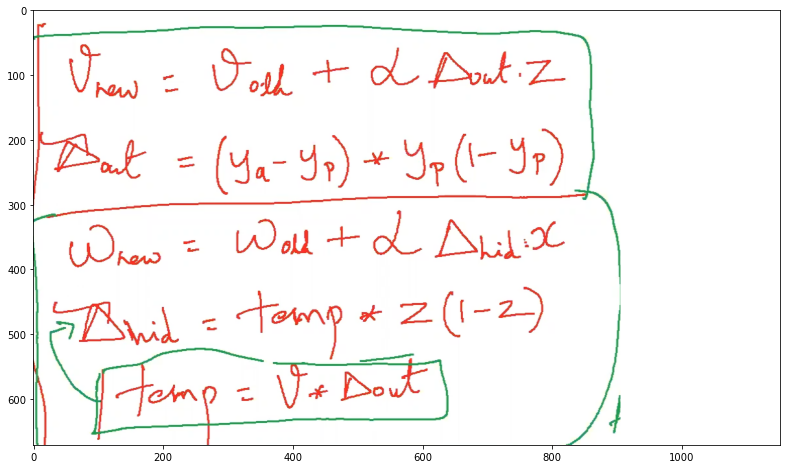

In [22]:
plt.figure(figsize=(15,8))
image=img.imread('Backward_pro.png')
plt.imshow(image)

In [23]:
def sigmoid(z):
    sig=1/(1+np.exp(-z))
    return sig

def forword(x):
    z1=np.dot(x,w1)
    y1=sigmoid(z1)
    z2=np.dot(y1,w2)
    out=sigmoid(z2)
    return out,y1


def backward(x,y,w1,w2,y1,out):
    out_err=y-out
    #out_delta=(y_a-y_p)*y_p(1-y_p)
    out_delta=out_err*(out*(1-out))
    
    #w2 is here is column vector, we need to convert it to row vector
    #this nothing but temp(see image)
    y1_err=np.dot(out_delta,w2.T)     
    y1_delta=y1_err*(y1*(1-y1))     
    
    w2+=np.dot(y1.T,out_delta)          #Consider alpha=1
    #y1_delta is in row_vector so convert x as well
    w1+=np.dot(x.T,y1_delta)  
    
    return w1,w2


def train(x,y):
    [out,y1]=forword(x)
    backward(x,y,w1,w2,y1,out)
    return w1,w2,out


def predict(tes):
    [out,y1]=forword(tes)
    pred=out
    return pred
    
    

In [24]:
#Training
loss=np.zeros([1000,1],dtype=float)
for i in range(1000):
    [w1,w2,out]=train(x,y)
    #Just for demonstration we are using mean_squared_error(normal for classification we need to use logloss function) 
    loss[i]=np.mean(np.square(y-out)) 
    #print(loss[i])

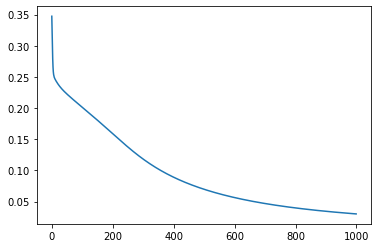

In [25]:
#plot
plt.plot(loss)

In [ ]:
#Loss is reduced suddenly at initial steps and again took slowly(till 600 iteration) and later error is reached below .05(at 1000 iteration).

In [26]:
#testing
tes=np.array([[0,0],[0,1],[1,0],[1,1]])
pred=predict(tes)
pred

array([[0.22055718],
       [0.83634331],
       [0.85052562],
       [0.14976509]])

In [ ]:
#It means first and last samples belongs to class-0 
#and second and third samples belongs to class-1

Check Final weights

In [27]:
print('Weights :\n',w1)

Weights :
 [[ 5.21461815 -7.4545047  -0.46525919]
 [ 5.47993783  3.60344253  0.95091813]]


In [28]:
print('Weights :\n',w2)

Weights :
 [[  7.76670683]
 [  5.23451901]
 [-15.52607049]]


In [29]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(x,y)
ypred=logit.predict(x)
ypred

C:\Users\SJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([0, 0, 0, 0])

In [ ]:
#from logistic Regression prediction is not good bcoz data is less but ANN model perform well above

How to introduce bias ?

In [30]:
x=np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])  #add 1 in every row
y=np.array(([0],[1],[1],[0])) 

In [32]:
inp_size=3   #because 2 features
hid_size=3   #depends on you
out_size=1   #one output



In [33]:
w1=np.random.randn(inp_size,hid_size)
w1

array([[ 0.5787994 , -1.47037202, -0.00659282],
       [-0.40814016, -0.68483891, -0.74630824],
       [-0.23737179,  0.28325856,  0.72031939]])

In [34]:
w2=np.random.randn(hid_size,out_size)
w2

array([[-0.32477693],
       [-1.68571349],
       [-0.87420276]])

In [35]:
def sigmoid(z):
    sig=1/(1+np.exp(-z))
    return sig

def forword(x):
    z1=np.dot(x,w1)
    y1=sigmoid(z1)
    z2=np.dot(y1,w2)
    out=sigmoid(z2)
    return out,y1


def backward(x,y,w1,w2,y1,out):
    out_err=y-out
    #out_delta=(y_a-y_p)*y_p(1-y_p)
    out_delta=out_err*(out*(1-out))
    
    #w2 is here is column vector, we need to convert it to row vector
    #this nothing but temp(see image)
    y1_err=np.dot(out_delta,w2.T)     
    y1_delta=y1_err*(y1*(1-y1))     
    
    w2+=np.dot(y1.T,out_delta)          #Consider alpha=1
    #y1_delta is in row_vector so convert x as well
    w1+=np.dot(x.T,y1_delta)  
    
    return w1,w2


def train(x,y):
    [out,y1]=forword(x)
    backward(x,y,w1,w2,y1,out)
    return w1,w2,out


def predict(tes):
    [out,y1]=forword(tes)
    pred=out
    return pred
    

In [36]:
#Training
loss=np.zeros([1000,1],dtype=float)
for i in range(1000):
    [w1,w2,out]=train(x,y)
    #Just for demonstration we are using mean_squared_error(normal for classification we need to use logloss function) 
    loss[i]=np.mean(np.square(y-out)) 
    #print(loss[i])

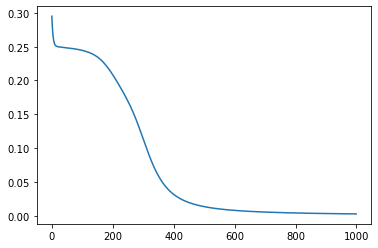

In [37]:
#plot
plt.plot(loss)

In [39]:
#testing
tes=np.array([[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
pred=predict(tes)
pred

array([[0.04339096],
       [0.94223049],
       [0.96317234],
       [0.06123471]])

In [ ]:
#Now classes are classified well due to introduce of bias

In [40]:
w1  #weights

array([[ 5.63566041,  2.17498618,  1.02356318],
       [-4.39601441, -5.36950603, -0.80912843],
       [-3.34407311, -5.87034232,  2.56973413]])

In [41]:
w2  #weights

array([[ 7.30942512],
       [-8.49080593],
       [-3.74082717]])

                                                 ---Thank you---